# DATA 201: Week 4 Weather Statistics
For this exercise we will look at (nicely structured and formatted) weather station data from Jefferson Lab: https://www.jlab.org/fm/wx/


There are two comma separated value files that contain weather station data from the week of Huricane Dorian https://en.wikipedia.org/wiki/Hurricane_Dorian

**Read in the data (from the large file) into lists (or numpy arrays) and produce the following figures**:
1. Temperature vs Time
2. Wind speed vs Time
3. Barometric pressure vs Time
4. Temperature vs Time and Heat Index vs Time on the same plot w/Legend

Your plots must be properly labeled with units!

For the date time axis you may want to us np.datetime64() to cast the values to datetime objects which play nicely with matplotlib.

Column headers from headers.csv: `date_time,temperature,heat_index,humidity,barometric_pressure,wind_speed`

**Additional Questions that you should answer in your Jupyter notebook submission**:
1. What was the maximum wind speed? At what time was the maximum wind speed?
2. Is the barometric pressure lower or higher as a hurricane passed by? What was the barometric pressure and at what time
3. Do you notice a correlation between windspeed and time of day? If so, what is it?

In [49]:
import math

import matplotlib.pyplot as plt
import numpy as np
import os
import csv
import tabulate

## Read in the Data and Convert to np array

In [50]:
with open(os.path.join("..", "data", "headers.csv")) as file:
    headers = file.readline().strip().split(',')



date_time = []
temperature = []
heat_index = []
barometric_pressure = []
wind_speed = []

with open(os.path.join("..", "data", "weather_09_01-08.csv")) as file:
    reader = csv.reader(file)
    for line in reader:
        date_time.append(line[0])
        temperature.append(line[1])
        heat_index.append(line[2])
        barometric_pressure.append(line[4])
        wind_speed.append(line[5])
        
date_time = np.array(date_time, dtype=np.datetime64)
temperature = np.array(temperature, dtype=np.float64)
heat_index = np.array(heat_index)
barometric_pressure = np.array(barometric_pressure)
wind_speed = np.array(wind_speed)

data = np.array([date_time, temperature, heat_index, barometric_pressure, wind_speed])
variable_label = ["Date/Time", "Temperature", "Heat Index", "Barometric Pressure", "Wind Speed"]
units = ["yy-mm-dd", "Deg. F", "Deg. F", "in", "mph"]

print(f"Headers: {headers}")
fig_x = 12
fig_y = 5

Headers: ['date_time', 'temperature', 'heat_index', 'humidity', 'barometric_pressure', 'wind_speed']


## Plot a Date Range vs Temperature with matplotlib and numpy

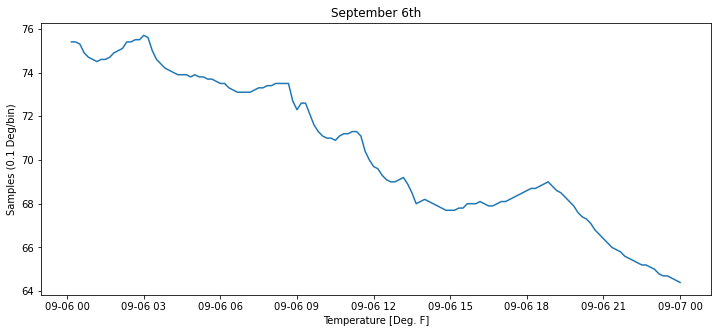

In [51]:
sept6 = np.datetime64('2019-09-06T00:01')
sept7 = np.datetime64('2019-09-07T00:01')
sept6_bool = (date_time > sept6) & (date_time < sept7)


plt.figure(figsize=(fig_x, fig_y))
plt.title("September 6th")
plt.xlabel("Temperature [Deg. F]")
plt.ylabel("Samples (0.1 Deg/bin)")
plt.plot(date_time[sept6_bool], temperature[sept6_bool])
plt.show()

## Histogram of a date range vs temperature

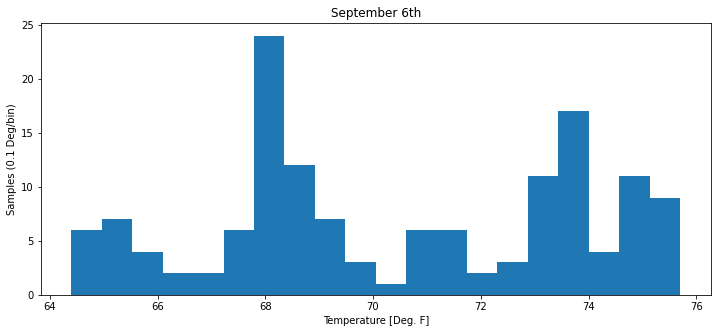

In [52]:
plt.figure(figsize=(fig_x, fig_y))
plt.title("September 6th")
plt.xlabel("Temperature [Deg. F]")
plt.ylabel("Samples (0.1 Deg/bin)")
plt.hist(temperature[sept6_bool], bins=20)
plt.show()



## Descriptive Statistics for each Day

In [53]:
print(f"Temp Mean for Sept 6th:\t{temperature[sept6_bool].mean()} [deg F]")
print(f"Temp Standard Dev for Sept 6th:\t{temperature[sept6_bool].std()} [deg F]")

Temp Mean for Sept 6th:	70.44545454545455 [deg F]
Temp Standard Dev for Sept 6th:	3.3120404897850877 [deg F]


In [54]:
each_day = []
temperature_means = []
temperature_stdev = []
temperature_dates = []

# Generate Temperature Means, Standard Dev, and Dates

for i in range(1, 8):
    time_min = np.datetime64(f'2019-09-{i:02d}T00:01')
    time_max = np.datetime64(f'2019-09-{i+1:02d}T00:01')
    bool_for_one_day = (date_time > time_min) & (date_time < time_max)

    temperature_means.append(temperature[bool_for_one_day].mean())
    temperature_stdev.append(temperature[bool_for_one_day].std())
    temperature_dates.append(time_min)
    each_day.append(bool_for_one_day)

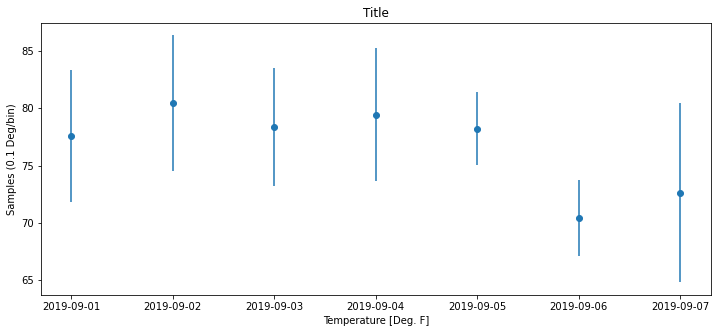

In [55]:
plt.figure(figsize=(fig_x, fig_y))
plt.title("Title")
plt.xlabel("Temperature [Deg. F]")
plt.ylabel("Samples (0.1 Deg/bin)")
plt.errorbar(temperature_dates, temperature_means, yerr=temperature_stdev, fmt="o")
plt.show()

In [56]:
print("High and Low Temperatures for the Week\n")
k = 0
for day in each_day:
    print(f"Date:\t{temperature_dates[k]}")
    print(f"High:\t{np.max(temperature[day])} deg. F")
    print(f"Low:\t{np.min(temperature[day])} deg. F")
    print("\n")
    k += 1

High and Low Temperatures for the Week

Date:	2019-09-01T00:01
High:	87.0 deg. F
Low:	69.9 deg. F


Date:	2019-09-02T00:01
High:	90.9 deg. F
Low:	73.7 deg. F


Date:	2019-09-03T00:01
High:	89.9 deg. F
Low:	72.6 deg. F


Date:	2019-09-04T00:01
High:	89.7 deg. F
Low:	72.0 deg. F


Date:	2019-09-05T00:01
High:	85.4 deg. F
Low:	75.1 deg. F


Date:	2019-09-06T00:01
High:	75.7 deg. F
Low:	64.4 deg. F


Date:	2019-09-07T00:01
High:	84.8 deg. F
Low:	62.2 deg. F




### Histogram for All Variable for the entire week:

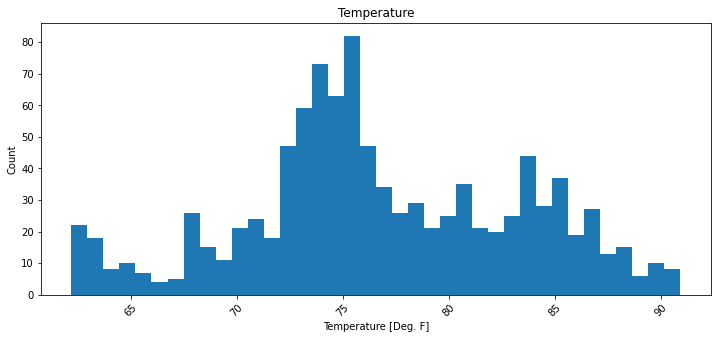

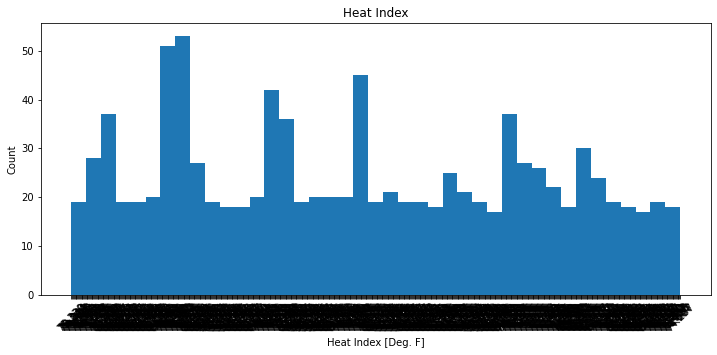

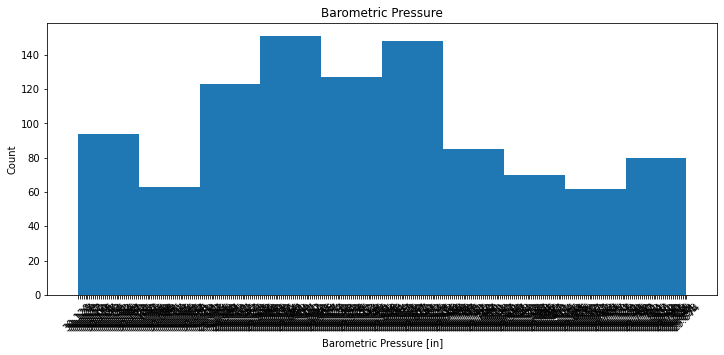

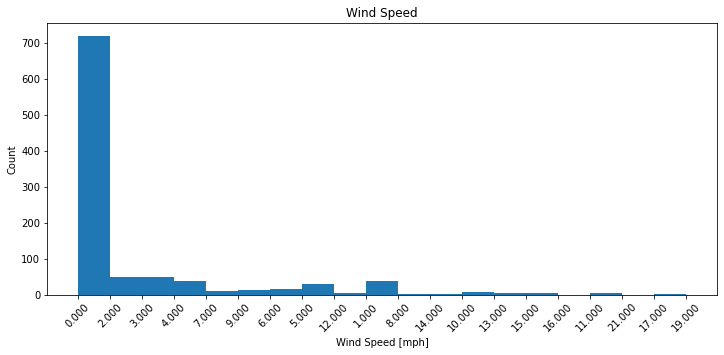

In [63]:

for m in range(1, len(data)):
    variable = data[m]
    r = int(float(np.max(variable)) - float(np.min(variable)))
    max = float(np.max(variable))
    min = float(np.min(variable))

    fig = plt.figure(figsize=(fig_x, fig_y))
    plt.title(f"{variable_label[m]}")
    plt.xlabel(f"{variable_label[m]} [{units[m]}]")
    plt.ylabel(f"Count")
    plt.xticks(rotation=45)
    plt.hist(variable, bins=r+10)
    plt.show()



### Histogram for All Variable for Sept 6th:

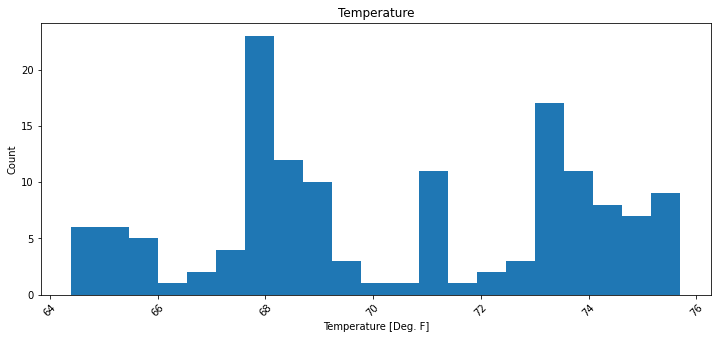

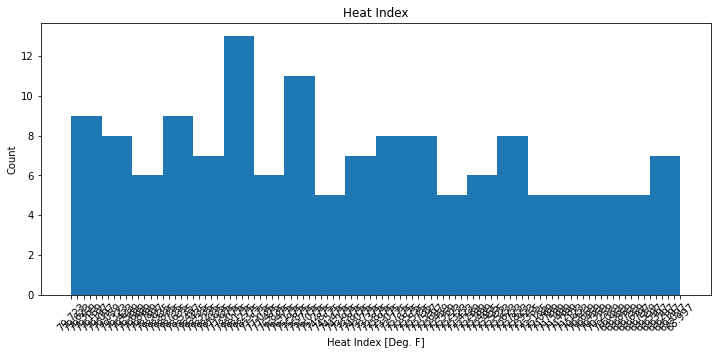

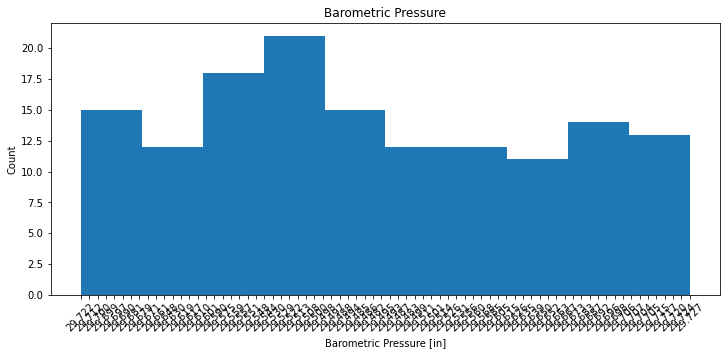

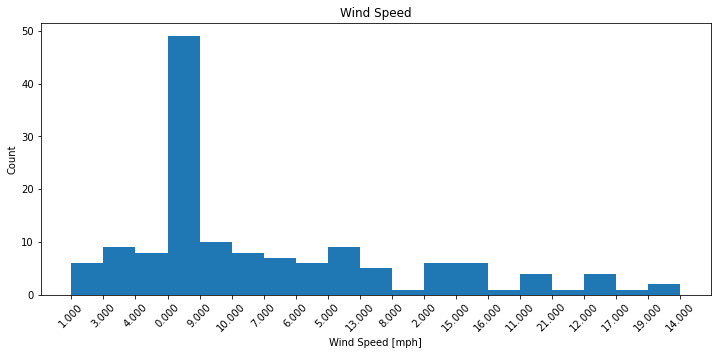

In [62]:
for m in range(1, len(data)):
    variable = data[m][sept6_bool]
    r = int(float(np.max(variable)) - float(np.min(variable)))
    max = float(np.max(variable))
    min = float(np.min(variable))

    fig = plt.figure(figsize=(fig_x, fig_y))
    plt.title(f"{variable_label[m]}")
    plt.xlabel(f"{variable_label[m]} [{units[m]}]")
    plt.ylabel(f"Count")
    plt.xticks(rotation=45)
    plt.hist(variable, bins=r+10)
    plt.show()
